In [3]:
import os
import numpy as np
import networkx as nx

import process
import pandas

# Chip analysis

The following notebook is an analysis notebook. It has been conceived to order and analyse a dump of confocal images. All questions concerning the code should be emailed to gustave.ronteix@pasteur.fr.

### Processing

The grunt functions are called from process.

Attention: verify the channel order.

In [4]:
livePosition = 2
green = 1
orange = 0

channels = [livePosition, green, orange]

zRatio = 1/3
rNoyau = 9
dCells = 70

path = r'\\atlas.pasteur.fr\Multicell\Gustave\fusionGustave\TIFF\0'

In [5]:
process._sortFiles(path)

Please verify that the filename order is $xy$ then $z$ then $t$


check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the 

check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure
check the file name structure



In [3]:
process._makeSpheroidClass(path, zRatio, rNoyau, dCells, channels)

prep image: 00 folder and time 00
9
image made, starting nuclei ID
(161, 1022, 1024)


C:\Users\gronteix\AppData\Local\Continuum\anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


Convolution Time:  33.735670600000006
Corrdinates ID Time:  6.599431999999993
64 cells ID
nuclei gotten, make spheroid
refine the analysis over the spheroid
X:\Gustave\Experiments\Nuclei Segmentation\04072019\Seb\tif\\Spheroids\spheroid_00_00.json
prep image: 01 folder and time 00
9
image made, starting nuclei ID
(161, 1022, 1024)
Convolution Time:  35.506738299999995
Corrdinates ID Time:  7.467863899999998
42 cells ID
nuclei gotten, make spheroid
refine the analysis over the spheroid
X:\Gustave\Experiments\Nuclei Segmentation\04072019\Seb\tif\\Spheroids\spheroid_01_00.json

Spheroids made


Remarquons que la segmentation du spheroide dans un ou l'autre des types de cellules depend ici du classificateur naif que nous avons cree. Il repose sur un fit lineaire des points en fonction de leur couleur. On trouve que ce dernier doit avoir comme pente:

$a = \frac{<xy>}{<x^2>}$

Le signe par rapport a celui-ci est donne par:

$sign = y - a*x$

Ce qui nous donne par consequence un moyen rapide pour affecter un genre a chaque cellule.

In [4]:
IntensityPath = r'X:\Gustave\Experiments\Nuclei Segmentation\04072019\Seb\tif\Spheroids\\'

In [5]:
df1 = pandas.read_csv(IntensityPath + 'intensityFrame_00_00.csv')
df2 = pandas.read_csv(IntensityPath + 'intensityFrame_01_00.csv')

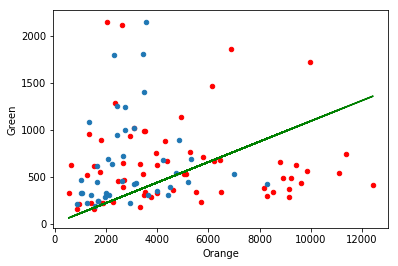

In [10]:
import matplotlib.pyplot as plt


ax1 = df1.plot.scatter(x='Orange',y='Green', c= 'r')
df2.plot.scatter(x='Orange',y='Green', ax = ax1)
plt.plot(df['Orange'], a*df['Orange'], 'g-')

In [7]:
df = df1.append(df2)

In [8]:
a = df['Orange'].dot(df['Green'])/df['Orange'].dot(df['Orange'])

In [9]:
len(df.loc[df['Green']-a*df['Orange']<0])

37

### Refined analysis

We use the refined metrics of networkx to add centrality, degree and other measures to the death/survival rates of the spheroid. The following process follows:

 - open json file
 - modify the spheroid properties
 - save global properties in soheroid file
 - save file

In [ ]:
def _refineSph(dic):
    
    G = _makeG(dic)
    
    A = networkx.betweenness_centrality(G) # betweeness centrality
    B = networkx.clustering(G)
    C = networkx.degree(G)
    
    for v in G:
        
        dic['cells'][v]['degree'] = C[v]
        dic['cells'][v]['clustering'] = B[v]
        dic['cells'][v]['centrality'] = A[v]
        
    dic['N'] = len(dic['cells'])
    dic['assortativity'] = nx.degree_assortativity_coefficient(G)
    dic['average degree'] = np.asarray([float(C[v]) for v in G]).mean()
    
    return dic

In [ ]:
_refineSph(_Sph)

process._saveSpheroid(_Sph.Spheroid, path + '\spheroid_' + spheroidFolder + r'_' +  timeFolder + '.json')